# CS 110: Task scheduler program

***TLDR: Create a task scheduler that will take a list of tasks, their duration, dependencies (tasks that have to be completed before a particular task), whether they are flexible or have to happen at a fixed time and return a list of tasks in the order they should be completed.***

## Q1 - Setting up

### A: Table containing all of my tasks 

In [31]:
from tabulate import tabulate
table = [
    [1, "Make and eat breakfast",                           30,        None,        "Flexible",     "None"],
    [2, "Prepare for class",                               150,        None,        "Flexible",     "None"],
    [3, "Attend CS110 class",                               95,         [2],           "Fixed",    "14:00"],
    [4, "Make and eat lunch",                               80,      [1, 3],        "Flexible",     "None"],
    [5, "Talk to family",                                   90,        None,        "Flexible",     "None"],
    [6, "Visit and explore the Shilin Night Market",       230,   [1, 3, 4],           "Fixed",    "19:30"],
    [7, "Try the famous Michelin Star stew at the Shilin",  35,         [6],        "Flexible",     "None"],
    [8, "Look at Taipei from the top of Taipei 101",        90,         [6],        "Flexible",     "None"]
]
print(tabulate(table,
               headers=["ID", "Description", "Duration [minutes]",
                        "Dependencies", "Fixed/Flexible", "Starting time"]
               ))


  ID  Description                                        Duration [minutes]  Dependencies    Fixed/Flexible    Starting time
----  -----------------------------------------------  --------------------  --------------  ----------------  ---------------
   1  Make and eat breakfast                                             30                  Flexible          None
   2  Prepare for class                                                 150                  Flexible          None
   3  Attend CS110 class                                                 95  [2]             Fixed             14:00
   4  Make and eat lunch                                                 80  [1, 3]          Flexible          None
   5  Talk to family                                                     90                  Flexible          None
   6  Visit and explore the Shilin Night Market                         230  [1, 3, 4]       Fixed             19:30
   7  Try the famous Michelin Star stew at the Shi

### B: Explanation of the tasks

>These were the tasks that I planned to accomplish this Wednesday, November 16th. On Wednesdays the two tasks that I always have are the CS110 class, which always happens at fixed time at 14:00 and lasts about 95 minutes. The second class is the pre-class work I do for it, which I do on before my class. Since pre-class work has to happen before the class, the CS110 class task is dependent on the doing pre-class work. Besides that, I also plan on talk to my family since it has been quite a long time since I spoke to them last time due to a lot of obligations that I had. Of course, I also have breakfast and lunch, both being quite flexible, however, lunch has to happen after breakfast and I always take it after the CS110 class because it takes me around 80 minutes to make it and eat it, which is quite a lot of time. <br><br>
Finally, this assignment allowed me to complete some of the tasks that I have been delaying for quite a long time. Even though I have been in Taiwan for almost 2 months now, I still haven't visited any night markets, despite them being on of the most famous tourist destinations. Luckily, Taipei has the largest Night market in Taiwan, called Shilin Night market, that has more than 500 food stalls and shops. Since it opens only in the evenings, I decided that I would visit it at exactly 19:30 because by then, most of the shops had to have been already open. Of course, I decided that I would devote nearly 4 hours to exploring it, which also includes the time to get there. Also, I decided that it could only happen after I had already eaten breakfast, taken class and had lunch.<br><br>
I am a really big food lover and, thus, I planned to visit one of the most famous street restaurants in Taiwan, a small restaurant near the Shilling Market that has been making one particular meal - pork rib soup - for the last 40 years. The place is so famous that it has consistently, for the last decade, been awarded the Michelin star, and one of the items on my bucket list was to try a Michelin Star meal. I decided that this would be my reward that would come after finishing my tour of the Shilin market. <br><br>
Finally, I also wanted to visit the Taipei 101, which is the tallest building in Taiwan and was the tallest building in the world for a long time. I heard from my friends that the night view of the city is stunning and I really wanted to visit. I planned to visit it after visitng the night market since I wanted it to be done late in the evening. 

## Q2 - Preparing your algorithmic strategy

### A: As hinted in the introduction, you will implement a priority queue as the primary data structure in this assignment. Why is a priority queue a particularly well-suited data structure to prioritize tasks? Why don’t we simply sort a list of tasks?

>Using a list would only work if we were able to firstly perfectly calculate the priority values for each task and then put those tasks in a list which we would sort in O(nlogn) time. Then, we would be able to go from the element in the list with the highest priority to the one with the lowest priority, which would be O(n). However, calculating these priorities like this would be tremendously difficult and would necessitate other data structures such as graphs and algorithms such as topological sort.  <br><br>
Secondly, if we are calculating the what the next thing we should do dynamically and we wanted to add a new element to the list, we would have to resort the entire list, which would be O(nlogn) every time a new element is added. <br><br>
Instead of that, popping an element from a heap is O(1) and inserting an element is O(logn), which is the time complexity of heapifying again. This is because, when a new element is added, we would at most be doing O(log) swaps before the newly added element is placed in its correct position. Thus, the time complexity of inserting and removing elements from a heap is O(logn).<br><br>
Consequently, a priority queue is a much better data structure to prioritize tasks because it is much more efficient than a list as it allows for dynamic adding of new elements and removing at much better time efficiency.

An important consideration is to gauge whether you need one or more instances of priority queues. For instance, tasks can be time flexible, and others might be fixed in time (you can prepare for class at any time before it starts, but the session time is fixed). Would you separate these tasks into different priority queues to account for these two possibilities? Why or why not?

> In this particular case, I will have two priority heaps, one for the fixed tasks and one for the flexible tasks. This is because fixed tasks have to be done at certain times, regardless of the situation with fixed tasks. Consequently, it is entirely possible that these tasks will have different priority values than the flexible tasks. Not only that, but it is much easier to keep account of what the next fixed task is if we keep them in a separate heap. This is tremendously useful since then we can easily know how much time we have left for flexible tasks before we have to do the next fixed task. This would be more difficult and time inefficient in a single heap since we would have to traverse it to find the next one. Another problem that could arise with a single heap is, unless rewards are perfectly calculated, that there could still be flexible tasks that have higher priority than the next fixed tasks even though the fixed tasks has to happen soon or even now.

### B: Describe how your scheduler will work at a very high level. Consider explaining the algorithmic approach to scheduling to a peer who has not taken CS110 before. Avoid using technical jargon and instead focus on how the algorithm digests several tasks and returns an output. Ideally, your description needs to be clear and concise enough that anyone fluent in Python can implement it in code.

> The first element of understanding the problem is understanding what *main* attributes each task has.
In this case, we have the duration of the task, whether a task is fixed or flexible, what its dependencies are (what other tasks have to be done before it) and at what time it has to be done - if it fixed.<br><br>
We then use the attribute of whether a task is fixed or flexible to decide whether we should put it in the fixed or flexible heap. Afterwards, we want to calculate the priority of each task in both of these heaps.<br><br>
For flexible tasks, we calculate the priority by looking at each task's duration and dependencies. The priority of those who have no dependencies is calculated inversely proportional to their duration (we want the ones that are shortest to be done first so they have higher priority). <br>
On the other hand, those that have dependencies will have lower priority that the tasks that they depend on. This is because we want to make sure that the tasks that they depend on are done first. The priority of each task that has dependencies will be smaller than the smallest priority of its dependency. <br><br>
For fixed tasks, we calculate their priority by the time of the day that they have to be done. Those that are to be done earlier in the day will have higher priority. <br><br>
After we have calculated the priority of each task, we can now start scheduling them. We start by calculating how much time we have until the next fixed task. We do all the tasks that we can from the flexible tasks, starting from the one with highest priorities, until we can no longer fit more tasks before the beginning of the fixed tasks. Then, we do the fixed task and repeat this same process for the next fixed task. In the end, we should ideally have no more tasks to do. For example, if there is no more fixed tasks left to do in the day, we can just proceed and do all the flexible tasks that we have left, and vice versa.  <br><br>

### C: Priority Values


>Firstly, my scheduler will work accoridng to priority values where tasks that have a higher priority (which will be explained later on) will be done first. <br><br>
For each task, I will calculate its priority value.<br><br>
There are three different groups of tasks that have their own unique formula for calculating their priority values. <br><br>

>1. **Fixed tasks**: <br>
>>Fixed tasks are tasks that have to be done at a certain time. For example, a class that starts at 9:00 AM. <br><br>
The priority value of a fixed task is calculated by the time of the day that it has to be done. The earlier the task has to be done, the higher the priority value. This is because we want to make sure that we do the tasks that have to be done earlier in the day first. Essentially, the priority value of fixed tasks is inversely proportional to their start time. <br><br>
Since the *start_time* takes input in form of hours (e.g. 14:30 is 14.5, which later gets converted into 14.5 * 60 mintues) we can calculate the priority value with the formula<br><br>***priority_value $ = \frac{1}{task.start_time} \times 10000$***. <br><br>
As such, fixed task at 10:00 am will have a priority value of 1/10 * 10000 = 1000 whereas fixed task at 14:30 will have a priority value of 1/14.5 * 1000 = 689.7 meaning that the task at 10:00 will be executed out before the one at 14:00. The times 10000 is just so that the priority values are not too small. It has no impact on the code. <br><br>

>2. **Flexible tasks**: <br>
>>Flexible tasks are tasks that can be done at any time.<br><br>
The priority value of a flexible task is dependent on the task's duration and its dependencies. <br><br>
>>> 1. **Tasks without dependencies**: <br>
>>>Since I want to optimize for the number of tasks completed in total, I want to make sure that the tasks that are shorter are done first. This means that the priority value of a task that has no dependencies is calculated inversely proportional to its duration.<br><br>
>>>The priority value of a task without dependencies is calculated with the formula: <br><br>***priority_value = $\frac{1}{task.duration} \times 10000$***.. <br><br>
As such, a task that takes 1 hour to complete will have a priority value of 1/1 * 10000 = 10000 whereas a task that takes 2 hours to complete will have a priority value of 1/2 * 10000 = 5000. This means that the task that takes 1 hour to complete will be executed out before the one that takes 2 hours to complete. The times 10000 is just so that the priority values are not too small. It has no impact on the code. <br><br>
>>> 2. **Tasks with dependencies**: <br>
>>>For tasks that have dependencies, we want to ensure that they happen after the tasks that they are dependent on. We can accomplish this by ensuring that they have a smaller priority than the smallest priority of its dependencies. If two tasks have the same dependencies, we want to do the one that is shorter. <br><br>
>>>As such, the priority value of a task with dependencies is calculated with the formula <br><br>***priority_value = (min(dependencies.priorities) - task.duration) $   \times 10000$***. <br><br>





# Q3 - Python Implementation

### A: MaxHeap class

This code is adapted and improved up from the session 7.1 pre-class work

In [32]:
class MaxHeapq:

    """ 
    Class implementing a max heap.

    Attributes
    ----------
    heap: list
        A list of integers representing the heap
    heap_size: int
        The number of elements in the heap

    Methods
    ----------
    left(i)
        returns the index of the left child node
    right(i)
        returns the index of the right child node
    parent(i)
        returns the index of the parent node
    max_key()
        returns the highest key in the priority queue
    heappush(key)
        inserts a key into a priority queue
    increase_key(i, key)
        modifies the value of a key in a max priority queue
    heapify(i)
        creates a max heap from the index given
    build_max_heap()
        builds a max heap from the list given
    """

    def __init__(self):
        """
        Constructor for the MaxHeapq class.

        Attributes
        ----------
        heap: list
            A list of integers representing the heap
        heap_size: int
            The number of elements in the heap
        """

        self.heap = []
        self.heap_size = 0

    def left(self, i):
        """
        Takes the index of the parent node and returns the index of the left child node

        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of left child node
        """

        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node and returns the index of the right child node

        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of right child node
        """

        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node and returns the index of the parent node

        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of parent node
        """

        return (i - 1)//2

    def max_key(self):
        """
        Returns the highest key in the priority queue

        Parameters
        ----------
        None

        Returns
        ----------
        int
            The highest key in the priority queue
        """
        return self.heap[0]

    def heappush(self, key):
        """
        Inserts a key into a priority queue

        Parameters
        ----------
        key: int
            The key to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(float("-inf"))
        self.increase_key(self.heap_size, key)
        self.heap_size += 1

    def increase_key(self, index, key):
        """
        Modifies the value of a key in a max priority queue, only if the new value is larger than the old value.

        Parameters
        ----------
        index: int
            The index of the key to be modified
        key: int
            The new value of the key

        Returns
        ----------
        None
        """
        if key < self.heap[index]:
            raise ValueError('The new key is smaller than the current key')
        self.heap[index] = key
        # while the parent is smaller than the child
        while index > 0 and self.heap[self.parent(index)] < self.heap[index]:
            # switch the parent and the child
            self.heap[self.parent(
                index)], self.heap[index] = self.heap[index], self.heap[self.parent(index)]
            index = self.parent(index)  # update the index

    def heapify(self, index):
        """
        Creates a max heap from the index given

        Parameters
        ----------
        index: int
            The index of the node to be heapified

        Returns
        ----------
        None
        """

        l_child = self.left(index)  # index of left child
        r_child = self.right(index)  # index of right child
        heap = self.heap

        largest = index  # assume the largest is the parent

        # if the left child is larger than the parent
        if l_child <= (self.heap_size-1) and heap[l_child] > heap[index]:
            largest = l_child
        # if the right child is larger than the variable largest
        if r_child <= (self.heap_size-1) and heap[r_child] > heap[largest]:
            largest = r_child

        if largest != index:  # if the largest is not the parent
            # switch the parent and the largest
            heap[index], heap[largest] = heap[largest], heap[index]
            self.heapify(largest)

    def heappop(self):
        """
        Removes the highest key in the priority queue

        Parameters
        ----------
        None

        Returns
        ----------
        int
            The highest key in the priority queue
        """
        if self.heap_size == 0:  # if the heap is empty
            raise ValueError('The heap is empty, there is no key to remove')
        # the highest key is the first element in the heap
        max_key = self.heap[0]
        # switch the first and the last element in the heap
        self.heap[0] = self.heap[-1]
        self.heap.pop()  # remove the last element in the heap
        self.heap_size -= 1  # decrease the heap size by 1
        # heapify the first element in the heap
        self.heapify(0)
        return max_key


#### Test cases

In [33]:
test_cases = {
    "Test 1": {
        "input": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "correct_output": [10, 9, 6, 7, 8, 2, 5, 1, 4, 3]
    },
    "Test 2": {
        "input": [4, 1, 3, 2, 16, 9, 10, 14, 8, 7],
        "correct_output": [16, 14, 10, 8, 7, 3, 9, 1, 4, 2]
    },
    "Test 3": {
        "input": [4, 1, 3, 2, 16, 9, 10, 14, 8, 7, 5, 6, 11, 12, 13, 15],
        "correct_output": [16, 15, 13, 14, 7, 10, 12, 8, 4, 2, 5, 3, 6, 9, 11, 1]
    },
    "Test 4": {
        "input": [10, 9, 8, 7, 6, 5, 4],
        "correct_output": [10, 9, 8, 7, 6, 5, 4]
    },
    "Test 5": {
        "input": [1, 52, -512, 63, 2, 6, 1, 1523, 6, 12],
        "correct_output": [1523, 63, 6, 52, 12, -512, 1, 1, 6, 2]
    },
    "Test 6": {
        "input":  [-2, -23, -5, -4, -7],
        "correct_output": [-2, -4, -5, -23, -7]
    }
}


def test_heap():
    for test in test_cases:  # go through each test case
        print(test)
        my_heap = MaxHeapq()  # create a new heap
        # go through each key in the test case and push them to the heap
        for key in test_cases[test]["input"]:
            my_heap.heappush(key)
        heap_list = my_heap.heap
        try:
            # check if the heap is correct
            assert heap_list == test_cases[test]["correct_output"]
            print(
                f"\t✅ Test passed.\n\tExpected {test_cases[test]['correct_output']}.\n\tGot {heap_list}")
        except AssertionError:
            print(
                f"\t❌ Test failed.\n\tExpected {test_cases[test]['correct_output']}.\n\tGot {heap_list}")


test_heap()


Test 1
	✅ Test passed.
	Expected [10, 9, 6, 7, 8, 2, 5, 1, 4, 3].
	Got [10, 9, 6, 7, 8, 2, 5, 1, 4, 3]
Test 2
	✅ Test passed.
	Expected [16, 14, 10, 8, 7, 3, 9, 1, 4, 2].
	Got [16, 14, 10, 8, 7, 3, 9, 1, 4, 2]
Test 3
	✅ Test passed.
	Expected [16, 15, 13, 14, 7, 10, 12, 8, 4, 2, 5, 3, 6, 9, 11, 1].
	Got [16, 15, 13, 14, 7, 10, 12, 8, 4, 2, 5, 3, 6, 9, 11, 1]
Test 4
	✅ Test passed.
	Expected [10, 9, 8, 7, 6, 5, 4].
	Got [10, 9, 8, 7, 6, 5, 4]
Test 5
	✅ Test passed.
	Expected [1523, 63, 6, 52, 12, -512, 1, 1, 6, 2].
	Got [1523, 63, 6, 52, 12, -512, 1, 1, 6, 2]
Test 6
	✅ Test passed.
	Expected [-2, -4, -5, -23, -7].
	Got [-2, -4, -5, -23, -7]


### B - Activity Scheduler

In [34]:
# The code draws inspirations and improves upon the code from class 7.2

import random, copy


class Task:
    """
    A class to represent a task
    """

    def __init__(self, id, description, duration, is_fixed, dependencies, start_time):
        """
        Constructor for the Task class

        Parameters
        ----------
        id: int
            The id of the task
        description: str
            The description of the task
        duration: int
            The duration of the task in minutes
        is_fixed: bool
            Whether the task is fixed or not
        dependencies: list
            A list of IDs of tasks that the given task is dependent on
        start_time: float
            The start time of the task in format of hours. If start time is at 14:30, the start time is 14.5
        priority_value: int
            The priority value of the task. 
            Initialized at 0. Will be calculated dynamically later.
        current_status: str
            The current status of the task. Initialized at "NOT_STARTED". 
            Will be updated dynamically later to either "IN_PROGRESS" or "COMPLETED". 
        """

        self.id = id
        self.description = description
        self.duration = duration
        self.is_fixed = is_fixed
        self.dependencies = dependencies
        self.start_time = start_time
        self.current_status = "NOT_STARTED"
        self.priority_value = 0

    def __lt__(self, other):
        """
        Defines the less than operator for the Task class

        Parameters
        ----------
        other: Task object or int
            The other task to be compared with. Can be either a Task object or an int (priority value)

        Returns
        ----------
        bool
            True if the priority value of the current task is less than the other task
        """

        if type(other) == int:
            return self.priority_value < other
        elif type(other) == Task:
            return self.priority_value < other.priority_value


class TaskScheduler:
    """
    A class to represent a task scheduler


    Methods
    ----------
    add_task(id, description, duration, is_fixed, dependencies, start_time)
        Adds a task to the task scheduler
    update_priority_values()
        Updates the priority values of all tasks in the task scheduler
    schedule_tasks()
        Schedules the tasks in the task scheduler
    """

    def __init__(self, tasks):
        """
        Constructor for the TaskScheduler class

        Parameters
        ----------
        tasks: list
            A list of Task objects
        fixed_priority_queue: MaxHeapq object
            A max heap priority queue to store the fixed tasks
        flexible_priority_queue: MaxHeapq object
            A max heap priority queue to store the flexible tasks        
        """

        self.tasks = tasks
        self.fixed_priority_queue = MaxHeapq()
        self.flexible_priority_queue = MaxHeapq()

    def print_self(self):
        """
        Prints the tasks in the task scheduler and if they still have dependencies.

        Parameters
        ----------
        None

        Returns
        ----------
        None
        """

        print("Tasks currently in the scheduler:")
        print("---------------------------------")
        for t in self.tasks:
            print(f"➡️'{t.description}', duration = {t.duration} mins.")
            if len(t.dependencies) > 0:
                print(f"\t ⚠️ This task depends on {t.dependencies}")
        print()

    def calculate_priority_values(self):
        '''
        Calculates the priority value of each task in the task scheduler and updates them

        Parameters
        ----------
        None

        Returns
        ----------
        None
        '''

        for task in self.tasks:
            if task.is_fixed:
                task.priority_value = int(1/task.duration*100000)
            else:  # If task is flexible
                min_dependency_priority = float("inf")
                if task.dependencies:  # If task has dependencies
                    for t in self.tasks:
                        if t.id in task.dependencies:
                            min_dependency_priority = min(
                                t.priority_value, min_dependency_priority)
                    task.priority_value = min_dependency_priority - task.duration*100
                else:  # If task has no dependencies
                    task.priority_value = int(1/task.duration*100000)

    def remove_dependency(self, dependency_id):
        '''
        Removes the completed task with dependency_id from the dependencies of all tasks

        Parameters
        ----------
        dependency_id: int
            The id of the completed task

        Returns
        ----------
        None
        '''
        for task in self.tasks:
            # if the task has the dependency_id in its dependencies, remove it
            if task.id != dependency_id and dependency_id in task.dependencies:
                task.dependencies.remove(dependency_id)

    def find_tasks_without_dependencies(self):
        '''
        Find tasks without dependencies and add them to their respective priority queues

        Parameters
        ----------
        None

        Returns
        ----------
        None
        '''

        for task in self.tasks:

            # if the task has no dependencies and has not started yet
            if task.current_status == "NOT_STARTED" and not task.dependencies:
                # Update current_status of the task
                task.current_status = "IN_PROGRESS"

                if task.is_fixed:
                    self.fixed_priority_queue.heappush(task)
                else:
                    self.flexible_priority_queue.heappush(task)

    def find_unscheduled_tasks(self):
        '''
        Checks if there are any unscheduled tasks

        Parameters
        ----------
        None

        Returns
        ----------
        bool
            True:  if there is at least one unscheduled task
            False: if all tasks are scheduled
        '''

        for task in self.tasks:
            if task.current_status == "NOT_STARTED":
                return True
        return False

    def format_time(self, time):
        '''
        Formats the time in the format of hours and minutes (HH:MM)
        436 -> 07:16

        Parameters
        ----------
        time: int
            The time in minutes

        Returns
        ----------
        str
            Time in format of hh:mm
        '''

        return f"{int(time)//60}h{int(time)%60:02d}"

    def print_completed_task(self, task, current_time):
        '''
        Prints the completed task

        Parameters
        ----------
        task: Task object
            The completed task

        Returns
        ----------
        None
        '''

        if task.is_fixed: current_time = task.start_time * 60

        print(f"🕰t={self.format_time(current_time)}")
        print(
            f"\tstarted '{task.description}' for {task.duration} mins.")
        current_time += task.duration
        print(
            f"\t✅ t={self.format_time(current_time)}, completed  {task.description}! with priority {task.priority_value}")

        task.current_status = "COMPLETED"
        # remove the completed task from the dependencies of other tasks
        self.remove_dependency(task.id)

        return current_time

    def run_task_scheduler(self, day_start_time):
        '''
        Runs the task scheduler. Calculates the priority values, schedules the tasks and prints the calculated schedule

        Parameters
        ----------
        day_start_time: int
            The start time of the day in minutes. For example, 8:00 AM is 8*60=480 minutes

        Returns
        ----------
        None
        '''

        # initialize the current time to the start time of the day
        current_time = day_start_time

        print("Running the simple scheduler:\n")
        self.calculate_priority_values()  # calculate the priority values of all tasks

        # while there are unscheduled tasks left or there are still tasks in the priority queues
        while self.find_unscheduled_tasks() or self.fixed_priority_queue.heap != [] or self.flexible_priority_queue.heap != []:
            # find tasks without dependencies and add them to their respective priority queues
            self.find_tasks_without_dependencies()

            if self.fixed_priority_queue.heap_size > 0:  # if there are fixed tasks in the priority queue

                next_fixed_task = self.fixed_priority_queue.max_key()

                if self.flexible_priority_queue.heap_size > 0:

                    # get the next flexible task
                    next_flexible_task = self.flexible_priority_queue.max_key()

                    # calculate the time available for flexible tasks before the next fixed task
                    flexible_time_gap = (
                        next_fixed_task.start_time*60) - current_time

                    if next_flexible_task.duration < flexible_time_gap:
                        current_time = self.print_completed_task(
                            self.flexible_priority_queue.heappop(), current_time)

                    else:
                        current_time = self.print_completed_task(
                            self.fixed_priority_queue.heappop(), current_time)

                else:
                    current_time = self.print_completed_task(
                        self.fixed_priority_queue.heappop(), current_time)

            else:

                current_time = self.print_completed_task(
                    self.flexible_priority_queue.heappop(), current_time)

        total_time = current_time - day_start_time

        print(f"\n🏁 Completed all planned tasks in {int(total_time)//60}h{int(total_time)%60:02d}min!")


    def task_scheduler_order(self, day_start_time):
        '''
        Runs the task scheduler. Calculates the priority values, schedules the tasks and returns the suggested schedule

        Parameters
        ----------
        day_start_time: int
            The start time of the day in minutes. For example, 8:00 AM is 8*60=480 minutes

        Returns
        ----------
        order: list
            The order of tasks to be completed
        '''
        order = []
        # initialize the current time to the start time of the day
        current_time = day_start_time

        self_copy = copy.deepcopy(self)

        self_copy.calculate_priority_values()  # calculate the priority values of all tasks

        # while there are unscheduled tasks left or there are still tasks in the priority queues
        while self_copy.find_unscheduled_tasks() or self_copy.fixed_priority_queue.heap != [] or self_copy.flexible_priority_queue.heap != []:
            # find tasks without dependencies and add them to their respective priority queues
            self_copy.find_tasks_without_dependencies()

            if self_copy.fixed_priority_queue.heap_size > 0:  # if there are fixed tasks in the priority queue

                next_fixed_task = self_copy.fixed_priority_queue.max_key()

                if self_copy.flexible_priority_queue.heap_size > 0:

                    # get the next flexible task
                    next_flexible_task = self_copy.flexible_priority_queue.max_key()

                    # calculate the time available for flexible tasks before the next fixed task
                    flexible_time_gap = (
                        next_fixed_task.start_time*60) - current_time

                    if next_flexible_task.duration < flexible_time_gap:
                        task = self_copy.flexible_priority_queue.heappop()
                        order.append(task.id)
                        current_time += task.duration
                        task.current_status = "COMPLETED"
                        # remove the completed task from the dependencies of other tasks
                        self_copy.remove_dependency(task.id)

                    else:
                        task = self_copy.fixed_priority_queue.heappop()
                        order.append(task.id)
                        current_time = task.start_time * 60
                        current_time += task.duration
                        task.current_status = "COMPLETED"
                        # remove the completed task from the dependencies of other tasks
                        self_copy.remove_dependency(task.id)

                else:
                        task = self_copy.fixed_priority_queue.heappop()
                        order.append(task.id)
                        current_time = task.start_time * 60
                        current_time += task.duration
                        task.current_status = "COMPLETED"
                        # remove the completed task from the dependencies of other tasks
                        self_copy.remove_dependency(task.id)

            else:
                task = self_copy.flexible_priority_queue.heappop()
                order.append(task.id)
                current_time += task.duration
                task.current_status = "COMPLETED"
                self_copy.remove_dependency(task.id)

        return order

In [35]:
tasks = [
    Task(1, "Make and eat breakfast", 30, False, [], None),
    Task(2, "Prepare for class", 150, False, [], None),
    Task(3, "Attend CS110 class", 95, True, [2], 14),
    Task(4, "Make and eat lunch", 100, False, [1, 3], None),
    Task(5, "Talk to family", 90, False, [], None),
    Task(6, "Visit and explore the Shilin Night Market",
         150, True, [1, 3, 4], 18),
    Task(7, "Try the famous Michelin Star stew near the Shilin",
         30, False, [6], None),
    Task(8, "Look at Taipei from the top of Taipei 101",
         60, False, [6], None)
]

task_scheduler = TaskScheduler(tasks)
task_scheduler.run_task_scheduler(8*60)


Running the simple scheduler:

🕰t=8h00
	started 'Make and eat breakfast' for 30 mins.
	✅ t=8h30, completed  Make and eat breakfast! with priority 3333
🕰t=8h30
	started 'Talk to family' for 90 mins.
	✅ t=10h00, completed  Talk to family! with priority 1111
🕰t=10h00
	started 'Prepare for class' for 150 mins.
	✅ t=12h30, completed  Prepare for class! with priority 666
🕰t=14h00
	started 'Attend CS110 class' for 95 mins.
	✅ t=15h35, completed  Attend CS110 class! with priority 1052
🕰t=15h35
	started 'Make and eat lunch' for 100 mins.
	✅ t=17h15, completed  Make and eat lunch! with priority -8948
🕰t=18h00
	started 'Visit and explore the Shilin Night Market' for 150 mins.
	✅ t=20h30, completed  Visit and explore the Shilin Night Market! with priority 666
🕰t=20h30
	started 'Try the famous Michelin Star stew near the Shilin' for 30 mins.
	✅ t=21h00, completed  Try the famous Michelin Star stew near the Shilin! with priority -2334
🕰t=21h00
	started 'Look at Taipei from the top of Taipei 101' for

### Q3 C:


C. In addition to the actual scheduler, provide at least one simple example to demonstrate how
your scheduler prioritizes tasks based on their priority value: demonstrate how changing the
order of the tasks in the input still produces the same output (the order of the scheduled tasks should be uniquely determined by their priority values). You need to do this using an assert statement (not by printing and manually checking that the result is the same).

In [36]:
tasks = [
    Task(1, "Make and eat breakfast", 30, False, [], None),
    Task(2, "Prepare for class", 150, False, [], None),
    Task(3, "Attend CS110 class", 95, True, [2], 14),
    Task(4, "Make and eat lunch", 100, False, [1, 3], None),
    Task(5, "Talk to family", 90, False, [], None),
    Task(6, "Visit and explore the Shilin Night Market",
         150, True, [1, 3, 4], 18),
    Task(7, "Try the famous Michelin Star stew near the Shilin",
         30, False, [6], None),
    Task(8, "Look at Taipei from the top of Taipei 101",
         60, False, [6], None)
]

task_scheduler_1 = TaskScheduler(tasks)
original_task_order = task_scheduler_1.task_scheduler_order(8*60)

for shuffle in range(10): # number of tests

     test = [
     Task(1, "Make and eat breakfast", 30, False, [], None),
     Task(2, "Prepare for class", 150, False, [], None),
     Task(3, "Attend CS110 class", 95, True, [2], 14),
     Task(4, "Make and eat lunch", 100, False, [1, 3], None),
     Task(5, "Talk to family", 90, False, [], None),
     Task(6, "Visit and explore the Shilin Night Market",
          150, True, [1, 3, 4], 18),
     Task(7, "Try the famous Michelin Star stew near the Shilin",
          30, False, [6], None),
     Task(8, "Look at Taipei from the top of Taipei 101",
          60, False, [6], None)
     ]

     random.shuffle(test)
     task_scheduler_2 = TaskScheduler(test)
     test_task_order = task_scheduler_2.task_scheduler_order(8*60)

     try:
          assert original_task_order == test_task_order
          print('orogianl', original_task_order, 'test', test_task_order)
          print(f"\t✅ Test passed for shuffle {shuffle}. The order of tasks is the same for both schedulers.")
     except AssertionError:
          print('orogianl', original_task_order, 'test', test_task_order)
          print(f"\t❌ Test failed for shuffle {shuffle}. The order of tasks is different for both schedulers.")



orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 0. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 1. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 2. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 3. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 4. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 5. The order of tasks is the same for both schedulers.
orogianl [1, 5, 2, 3, 4, 6, 7, 8] test [1, 5, 2, 3, 4, 6, 7, 8]
	✅ Test passed for shuffle 6. The order of tasks is the same

# Q4 - Let's test-drive your scheduler 

### Testing the algorithm

It’s time to take your data scheduler for a spin! Use this as an opportunity to efficiently plan a day where you explore your city of rotation. Take a camera or your phone with you and take pictures of the critical stages of this test—in all of the images, your face should be visible.

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

#images = [imread(f'{i}.jpg') for i in range(1, 6)]

#fig, axes = plt.subplots(1, 5, figsize=(20, 5))
#for i, ax in enumerate(axes):
    #ax.imshow(images[i])
    #ax.axis('off')
#plt.show()

### A: Critical analysis of the scheduler

**Benefits:**

>The scheduler proved exceptionally useful. As someone who likes to prioritize doing as many tasks as possible in a day, the scheduler helped me accomplish exactly that, so that at the end of the day I found myself looking back and realized that all of the tasks have been completed.<br><br>
What was even more remarkable for me was that, since I strictly followed the times devoted to each task, I actually find myself having free spaces inbetween tasks. For example, the break between finishing pre-class work and the class or making and eating lunch and visiting the Shilin market. This was such pleasant surprise for me and something that literally never happens to me. Since I usually do not have strictly defined times for tasks, I never have time to relax and enjoy the free spaces inbetween tasks because I just keep doing a task until its necessary to do the next one, which really stresses me out. Having these breaks allowed me to do some additional tasks that I didn't expect which is the first time in a long time where I did more than what was on my to-do list for the day, which is such an amazing feeling and I want to do it again!<br><br>
Also, it significantly decreased the amount of time I spent on planning my day and the decision fatigue. I used to spend a lot of time planning my day, but with the scheduler, I was able to plan my day in a matter of minutes by just estimating how long each task should take (I overestimated on purpose to avoid not having enough time and have some time for unexpected tasks).<br><br>I also used to have a lot of decision fatigue because I would have to decide what to do next and when to stop because I would always feel behind, but with the scheduler, I was able to just follow the orders of the tasks and not have to worry about deciding myself, whilst being confident that everything will be accomplished in the correct order. 


**Limitations:** 

>However, there are several drawbacks that I think are possible.<br>
>1. The algorithm and the schedule are generally quite rigid and it little room for spontaneity. Things can happen and we might have to change our plans quickly. Doing so, might make it a little difficult to do so with the scheduler. For example, if I suddentl had an emergency, I would have to change my schedule and I would have to do it manually. I would have to change the time of the tasks that I have already done and the time of the tasks that I have yet to do. This would be quite tedious with the schedule and even impossible if I don't have the program nearby. Maybe I also underestimated the duration of a task or I would like to spend more time at the Shilin Market because I found something awesome, now all other tasks would be pushed and it would be tedious to rearrange the schedule.<br><br>
>2. From another perspective, the fact that algorithm leaves free time spots might not always be an advantage. Perhaps we have a large backlog and we want to get as much done as possible. In this case, we would want to fill up all the time slots with tasks. However, this is an easy fix and we can just feed the backlog tasks too. <br><br>
>3. One could potentially want an additionally importance attributed. For example, there might be a task that irrelevant to its length or the number of dependencies has to be done. The code does not currently support this. However, this is also an easy fix and we can just add another attribute to the task class and add it to the priority calculation function. Generally, the code I have written is really easy to maintain and upgrade to be more sophisticated.<br><br>
>4. Sometimes it is possible to do multiple tasks at the same time. For example, if I had a task of travelling to Jiunfen, I could, at the same time, talk to my family. This is currently not supported but is a feature that can be easily added.<br><br>
>5. Another drawback is that it has no day end time by which tasks should be done. I did this purposely because it reflects how I usually go about my obligations. As a workaholic, I like to do as much as possible and try to finish as many of my tasks as possible, which can mean that I am flexible and often stay up very late or even pull all-nighters. However, this is not sustainable and it might be a habit I would want to change. In that case, it would be useful to have a certain set time by which I have to go to bed (e.g. 02:30 AM) and we can only complete tasks up until this time. This is quite a simple feature to implement and I would be happy to do so if I had more time. At the moment, someone could enter a lot of tasks that last for a very long time and the scheduler would suggest an order where you would be working constantly, unless you put a break or sleep task (a simple fix).<br><br>
>6. It might not be the most optimal when it comes to things that require travelling because in these cases it does not take into account the time it takes to travel or the distance. For example, it could have suggested that I go to the Taipei 101 after the Night Market even though the street food is much closer. Incorporating the functionality of this would significantly increase complexity and would in part be a travelling salesman problem. However, the scheduler works for tasks that are close to each other.<br><br>
>7. If a fixed task has dependencies that are too long, as in, the can not be completed before the fixed task starts, the scheduler will suggest that the person starts the task regardlessly, which makes sense since I sometimes can't always fully finish the preclasswork before class but I still want to start and do as much as possible. The only problem is that the output can be nicened a bit but that's a cosmetic issue, the feature is there and it works!

>Overall, the code is really efficient as it suggests a schedule that is optimal in terms of the number of things that I can accomplish in a day which is the essentially the only metric that I care about and follow perosnally. Others might have different metrics that they care about and the code can be easily modified to accomodate for that.

### B

Examine the efficiency of your schedule (the output of your program) and include any explicit reference to the metrics you employed to determine this. You might want to evaluate how many tasks are done during the day or how much utility we can get from the tasks scheduled; however, other metrics might be more meaningful, so be as creative as you would like.

>As explained above, my key metric is the number of tasks that get done, because that I something that I personally follow when I plan my day and my happiness is proportional to the number of tasks that I complete that day (as explained above, there are also cases where some tasks are really important and I will prioritize them over the quantity of other tasks but that is not the case here) <br><br>
>In my day, the scheduler successfuly suggested an order where all tasks are completed, meaning that it was absolutely successful!<br><br>In example 7. of the limitations, I mentioned that the scheduler would suggest that I start a task even if it can't be completed before the fixed task starts. However, if we know that we can't complete the dependency before the fixed tasks, instead of starting it, we might want to want to use the time to do as many other tasks thus prioritizing the quantity of tasks completed. I did not do this in this case, but it is a simple feature. <br><br> Bear in mind, it is not really a problem of the scheduler that it suggests that I start a task that I can't finish before the fixed task starts, it is more so the user's problem for not thinking about their plan in due time. Consequently, the scheduler is still extremely efficient. <br><br>

### C

Perform experiments to determine the efficiency of your scheduler (the actual program). Be as creative as you want in designing those experiments! You do not need to provide a complexity analysis, but you are expected to produce a plot to show-case how efficient your schedule is with an increasing number of tasks to be scheduled.

> I also measured how the runtime of the scheduler scales with the input size. I did that by starting with a small number of tasks (3) and then add a new random task (wiht all random attributes), calculate *number_of_trials=50* times how long it would take to suggest the order and save the average, then add another task and repeat. I did this for 300 tasks and the results are shown in the graph below. <br><br>

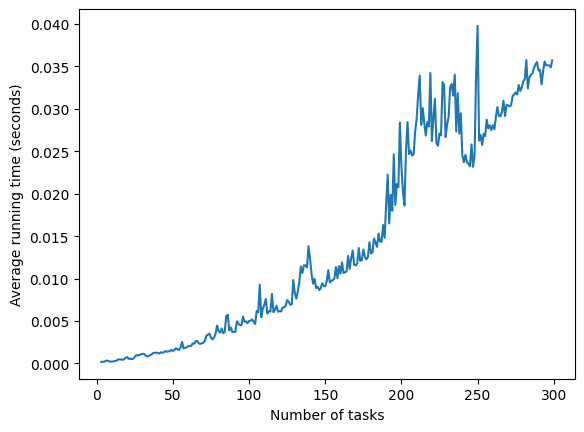

In [64]:
import time
import random
import matplotlib.pyplot as plt


def generate_random_task(max_id):
    task_id = max_id + 1 # generate a new id by incrementing the current max id
    task_duration = random.randint(1, 90) # random duration between 1 and 90 minutes
    task_name='n'
    is_fixed = random.choice([True, False])

    # randomly generate a random number of dependencies between 1 and a random number between 2 and max_id

    dependencies_upper_range = random.randint(2, max_id)
    dependencies = random.sample(range(1, dependencies_upper_range), random.randint(1, dependencies_upper_range-1))
   
    task_start_time = random.randint(8, 24) if is_fixed else None

    return (task_id, task_name, task_duration, is_fixed, dependencies, task_start_time)


a = generate_random_task(3)

n = 300
tasks = [
    Task(1, "Make and eat breakfast", 30, False, [], None),
    Task(2, "Do my laundry", 30, False, [], None),
    Task(3, "Go to the gym", 60, False, [], None),
]

number_of_trials = 50
average_times = []

for i in range(3, n):
    running_time = 0
    tasks.append(Task(*generate_random_task(i)))
    for j in range(number_of_trials):
        task_scheduler = TaskScheduler(tasks)
        start_time = time.time()
        task_scheduler.task_scheduler_order(8*60)
        running_time += time.time() - start_time
    average_times.append(running_time/number_of_trials)

plt.plot(range(3,n), average_times)
plt.xlabel('Number of tasks')
plt.ylabel('Average running time (seconds)')
plt.show()

> As we can see, the runtime has *quadratic scaling growth* O(n^2). From a time complexity point, this is not really efficient, however, I would argue that we should not be looking at asymptotical scaling growth at all. We are only going to have a fixed number of tasks (most likely under 15) and the runtime is going to be very small. For example, even if we had 300 tasks, the runtime would be only 0.035 seconds which is not a problem at all! Inputting that many tasks and dependencies would take much, much longer. <br><br> 
> One interesting thing though would happen with the average runtime if we had the end-day timing feature that I discussed above. In that case, at some point, given relatively stable task durations, the runtime would plateau past a certain threshold of number of tasks. This is because there is only so much that we can do in time, meaning that even if we inputted a lot of tasks, the code would break out as soon as we filled our day.


# Q5 - Getting back to the Board 


### A and B:

Equipped with the answers to the previous question, would you use your algorithm to schedule your day? Explain why or why not; please be as specific as possible.

Provide a high-level description of how your scheduler should be improved. Then, zoom in and include details on how you would implement those changes in practice (with an appropriate discussion on data structures and Python implementation).

>As someone who likes to prioritize doing as many tasks as possible in a day, the scheduler helped me accomplish exactly that. It also reduced my stress by giving me breaks and removing the decision fatigue. I would use the scheduler for tasks that do not require moving, as the schedule doesn't account for the time it takes to travel or the distance, and when I know I won't have any spontaneous changes in the plan.<br><br>
>Fixing this decision problem would mean we have to implement an approximate solution to the traveling salesman problem and make it work with the other priority values, and we would have to force the user to input distances, which is tedious.<br><br>
Another drawback that it doesn't include the day-end-time is easily fixable by asking for the day-end-time and then breaking out of the code if the current time + the next task's duration are greater than the day-end-time.<br><br>
We also have the problem of the planning fallacy (underestimating how long a task lasts) (Kahneman & Tversky, 1979). We can easily fix this by multiplying the durations by a constant greater than 1 to account for the underestimation.<br><br>
In the case where we might have really urgent tasks, we could have a boolean is_urgent or an integer urgency (qualitative variable 1-5) where we would multiply the priority by some factor to increase the priority, thus accounting for the urgency.<br><br>
Sometimes it is also possible to multitask. For example, talk to family whilst traveling on MRT. This could be added by adding a boolean attribute is_multitaskable, using which we could complete multiple tasks at the same time and have overlaps between two activities.

>Word count: 273